In [1]:
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
from IPython.core.display import Image, display

In [2]:
with open("../orders_eth_depth50_test.pkl", 'rb') as f:
    order_book = pickle.load(f)
order_book.shape

(36001, 201)

In [3]:
order_book.to_csv("../order_book.csv")

In [4]:
order_book.head()

timestamp  ask_price_0  ask_price_1  ask_price_2  ask_price_3  \
0  1603659600000       407.53       407.54       407.55       407.56   
1  1603659600100       407.53       407.54       407.55       407.56   
2  1603659600200       407.53       407.54       407.55       407.56   
3  1603659600300       407.53       407.54       407.55       407.56   
4  1603659600400       407.53       407.54       407.55       407.56   

   ask_price_4  ask_price_5  ask_price_6  ask_price_7  ask_price_8  ...  \
0       407.57       407.58       407.59        407.6       407.62  ...   
1       407.57       407.58       407.59        407.6       407.62  ...   
2       407.57       407.58       407.59        407.6       407.62  ...   
3       407.57       407.58       407.59        407.6       407.62  ...   
4       407.57       407.58       407.59        407.6       407.62  ...   

   bid_volume_40  bid_volume_41  bid_volume_42  bid_volume_43  bid_volume_44  \
0         37.580         49.858        338.195         56.940         80.605   
1         37.580         20.621        368.282         56.940         80.605   
2         37.580         20.621        367.282         56.940         80.605   
3        218.621        367.282         56.940         80.605         96.336   
4        218.621        367.282         44.940         80.605         96.336   

   bid_volume_45  bid_volume_46  bid_volume_47  bid_volume_48  bid_volume_49  
0         96.336          8.952         14.741          3.578        144.162  
1         96.336          8.952         14.741          3.578        144.162  
2         96.336          8.952         14.741          3.578        144.162  
3          8.952         14.741          3.578        144.162        157.561  
4          8.952         14.741          3.578        144.162        157.561  

[5 rows x 201 columns]

In [5]:
with open("../trades_eth_test.pkl", 'rb') as f:
    trades = pickle.load(f)
trades.shape

(16132, 9)

In [6]:
trades.to_csv("../trades.csv")

In [7]:
trades.head()

server_timestamp  last_trade_timestamp   batch_id  first_trade_timestamp  \
0     1603659600160         1603659600156  131608654          1603659600151   
1     1603659601435         1603659601433  131608655          1603659601426   
2     1603659601456         1603659601453  131608656          1603659601448   
3     1603659601456         1603659601453  131608657          1603659601448   
4     1603659601456         1603659601453  131608658          1603659601448   

   trade_price  trade_size  is_buyer_maker  first_trade_id  last_trade_id  
0       407.53       0.011           False              -1             -1  
1       407.53       0.007           False              -1             -1  
2       407.53       1.515           False              -1             -1  
3       407.53       1.000           False              -1             -1  
4       407.53       0.003           False              -1             -1

In [8]:
candle_data = pd.DataFrame(columns=['timestampt', 'Open', 'Low', 'High', 'Close', 'Volume'])
timeframe = 10 * 1000 # ms
i = 0
while i < trades.shape[0]:
    j = i
    while j + 1 < trades.shape[0] and (trades['last_trade_timestamp'][j + 1] - trades['last_trade_timestamp'][i]) < timeframe:
        j += 1
    volume = np.sum(trades['trade_size'][i:j])
    open_price = trades['trade_price'][i]
    close_price = trades['trade_price'][j]
    min_price = np.min(trades['trade_price'][i:j])
    max_price = np.max(trades['trade_price'][i:j])
    candle_data = candle_data.append({'timestampt': trades['last_trade_timestamp'][i],
                        'Open': open_price,
                        'Low': min_price,
                        'High': max_price,
                        'Close': close_price,
                        'Volume': volume
                       }, ignore_index=True)
    i = j + 1
    
candle_data.index = pd.to_datetime(candle_data.timestampt)
candle_data.head()

timestampt    Open     Low    High   Close  \
timestampt                                                                    
1970-01-01 00:26:43.659600156  1.603660e+12  407.53  407.53  407.59  407.60   
1970-01-01 00:26:43.659611634  1.603660e+12  407.60  407.59  407.64  407.64   
1970-01-01 00:26:43.659623219  1.603660e+12  407.64  407.42  407.64  407.43   
1970-01-01 00:26:43.659633783  1.603660e+12  407.42  407.41  407.50  407.41   
1970-01-01 00:26:43.659643889  1.603660e+12  407.41  407.37  407.48  407.48   

                                Volume  
timestampt                              
1970-01-01 00:26:43.659600156   43.301  
1970-01-01 00:26:43.659611634  237.847  
1970-01-01 00:26:43.659623219  260.635  
1970-01-01 00:26:43.659633783   86.976  
1970-01-01 00:26:43.659643889  111.797

# Mean reversion

### Bollinger Bands

In [9]:
candle_data['middle_band'] = candle_data['Close'].rolling(window=20).mean()
candle_data['upper_band'] = candle_data['Close'].rolling(window=20).mean() + candle_data['Close'].rolling(window=20).std()*2
candle_data['lower_band'] = candle_data['Close'].rolling(window=20).mean() - candle_data['Close'].rolling(window=20).std()*2

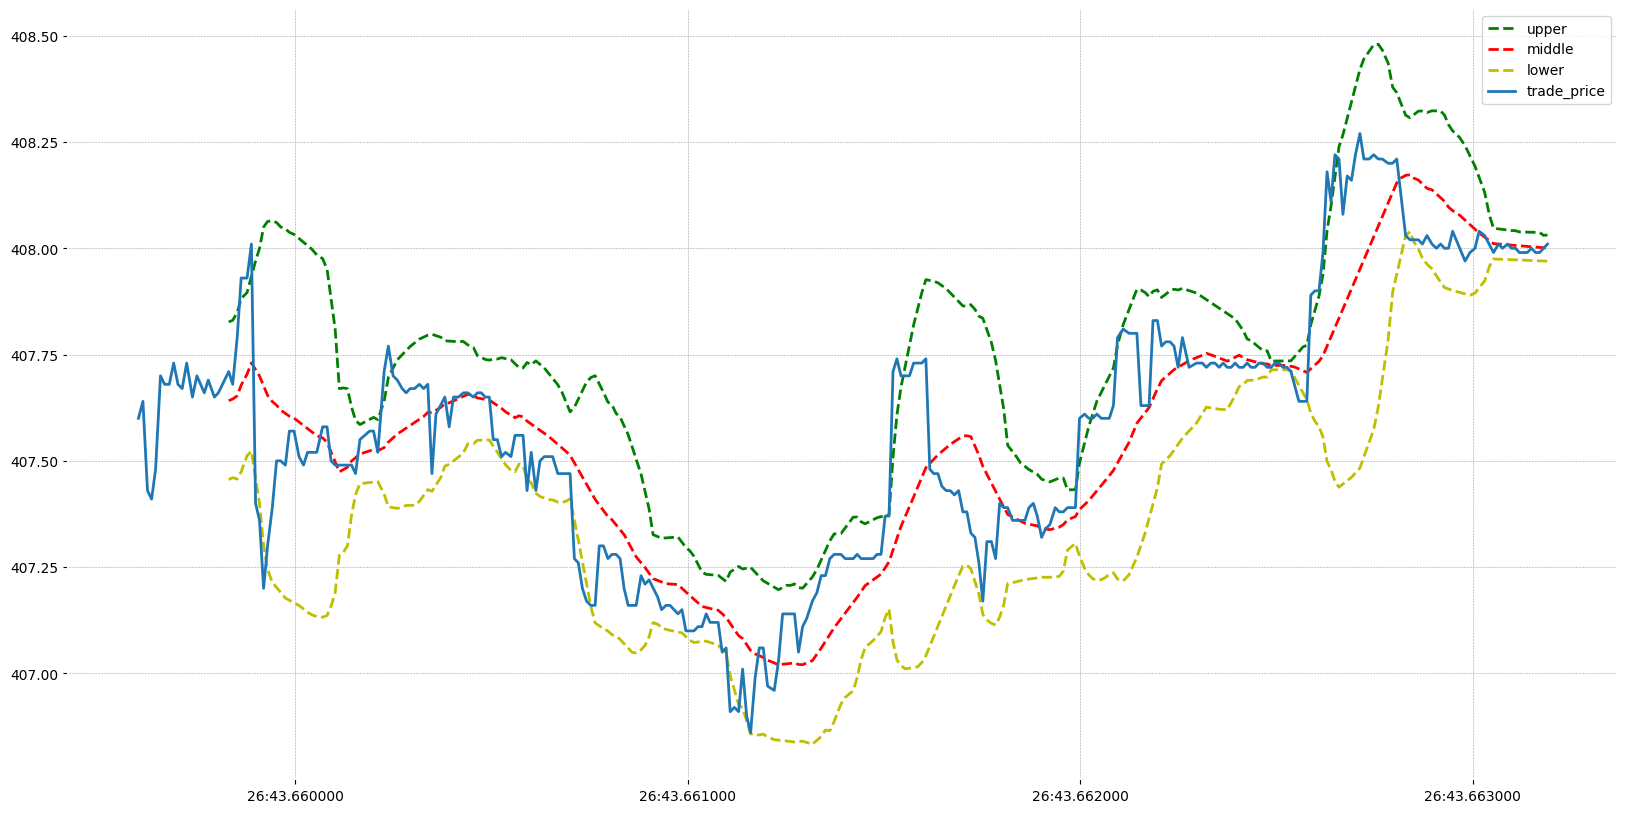

In [18]:
plt.figure(figsize=(20,10))
plt.plot(candle_data['upper_band'], 'g--', label="upper")
plt.plot(candle_data['middle_band'], 'r--', label="middle")
plt.plot(candle_data['lower_band'], 'y--', label="lower")
plt.plot(candle_data['Close'], label="trade_price")
plt.legend()
plt.show()

$Middle$_$band$ - скользящее среднее, которое указывает на общий тренд изменения цены. $Upper/Lower$_$band$ - верхняя и нижняя линии боллинджера, равные ($Middle$_$band$ + $2\sigma$) и ($Middle$_$band$ - $2\sigma$) соответсвенно. Следовательно понижении цены ниже $Lowerband$ говорит о превышении отклонения от действующего тренда в два раза, следовтельно логично предположить последующий рост(в связи с разворотом тренда), а вполне возможно и возвращение к среднему. Выход за границу может также говорить и о небольшой коррекции в рамках дальнейшего продолжения текущего тренда, поэтому появляется задача бинарной классификации: при понижении цены ниже $Lowerband$ определить является ли это коррекцией в рамках продолжения текущего тренда, или его разворот. Для решения данной задачи можно использовать $Логистическую\ регрессию$. Для формирования dataset'a можно пройтись по данным окном и добавить в X'ы подотрезки, которые заканчиваются в точках пересечения функции цены с $Lowerband$, а в $Y$ добавить $1$, если далее последовал разворот тренда(то есть рост) и $0$ иначе.



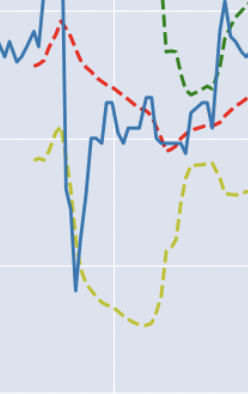

In [11]:
display(Image("Plots/BollingerPlot1.png"), Image("Plots/BollingerPlot2.png"))

### Z-score
#### $$ z = \frac{x - \mu}{\sigma} $$

In [12]:
candle_data['mu'] = [candle_data['Close'][:i].mean() for i in range(len(candle_data))]
candle_data['Z-score'] = [(candle_data['Close'][i] - candle_data['mu'][i]) / np.std(candle_data['Close'][:i]) for i in range(len(candle_data))]
candle_data['low-z-score'] = ['-1'] * len(candle_data)
candle_data['high-z-score'] = ['1'] * len(candle_data)

<ipython-input-12-9d0184303791>:2: RuntimeWarning: divide by zero encountered in double_scalars
  candle_data['Z-score'] = [(candle_data['Close'][i] - candle_data['mu'][i]) / np.std(candle_data['Close'][:i]) for i in range(len(candle_data))]


In [13]:
plt.figure(figsize=(20,10))
plt.plot(candle_data['mu'], 'r--', label="mu")
plt.plot(candle_data['Close'], label="trade_price")
plt.legend()
plt.show()

In [14]:
plt.figure(figsize=(20,10))
plt.plot(candle_data['high-z-score'], 'r--', label='high-z-score')
plt.plot(candle_data['low-z-score'], 'r--', label='lowe-z-score')
plt.plot(candle_data['Z-score'], label='Z-score')
plt.legend()
plt.show()

$Zscore$ - это отношение отклонения цены от среднего к стандартному отклонению. Следовательно понижении $Zscore$'a ниже $-1$ свидетельствует о ненормально резком отклонении цены от средней => логично предположить последующий рост цены с возвращением к среднему. Следовательно можно произвоодить покупку при достижении $Zscore < -1$ , а закрывать позицию, то есть производить продажу, при возвращении к $|Zscore| < 0.5$

### Moving average с разными окнами

In [15]:
candle_data['middle_band20'] = candle_data['Close'].rolling(window=20).mean()
candle_data['middle_band60'] = candle_data['Close'].rolling(window=60).mean()

In [16]:
plt.figure(figsize=(20,10))
plt.plot(candle_data['middle_band20'], 'g--', label="middle20")
plt.plot(candle_data['middle_band60'], 'y--', label="middle60")
plt.plot(candle_data['Close'], label="trade_price")
plt.legend()
plt.show()

$Middle$_$band60$ характеризует более общий тренд, чем $Middle$_$band20$, поэтому когда значение $Middle$_$band20$ падает ниже $Middle$_$band60$,то ожидается последующее возвращение к $Middle$_$band60$, что говорит о том, что текущая цена слишком низкая, поэтому можно предположить последующий рост.

# Market-making 

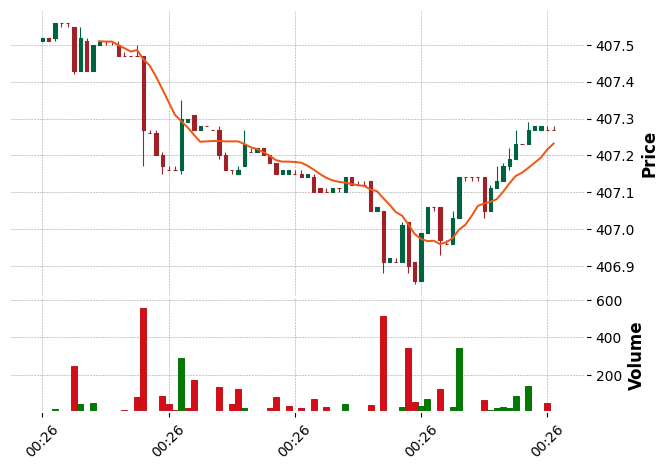

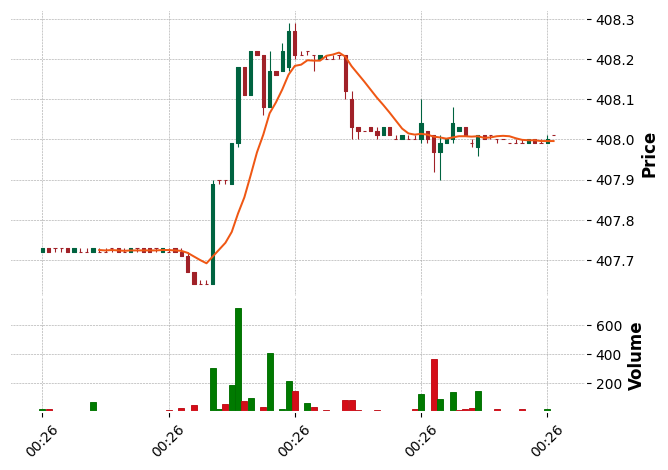

In [17]:
count_blocks = 4
block_size = candle_data.shape[0]//count_blocks
for block in range(0, block_size * count_blocks, block_size):
    mpf.plot(candle_data[block:block+block_size], 
             type='candle', 
             mav=10, 
             style='charles',
             volume=True)

Анализируя график можно обратить внимание на свечи с большой тенью, то есть на таймфреймы, в которых регистрируются сделки по высокой и низкой ценам одновременно, что говорит о высоком $spread$'е => можно собрать этот spread выставив большие $limit order$'ы на $best bid$ и $best ask$.

### Методы оценки


$Precision$  =  $TP \over TP + FN$
$Recall$ = $TP \over TP + FP$



$F$ = $2 * Precision * Recall \over Precision + Recall$
 $F_b$ = $(1 + b^2) * Precision * Recall \over b^2 * Precision + Recall$

$ROC AUC$ - площадь под графиком функции, заданной набором точек $(TPR, FPR)$ при разных параметрах

In [62]:
eps = 5e-5
def predictBoll(i):
    if candle_data['Close'][i] < candle_data['lower_band'][i] - eps:
        return True
    return False

def predictZ(i):
    if candle_data['Z-score'][i] < -1 - eps:
        return True

def check(i):
    for j in range(2, 10):
        if candle_data['Close'][i + j] < candle_data['lower_band'][i + j]:
            return False
    return True

def getF(predict, check):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(10, len(candle_data) - 10):
        if predict(i):
            if check(i):
                TP += 1
            else:
                FP += 1
        else:
            if check(i):
                FN += 1
            else:
                TN += 1
    precision = TP / (TP + FN)
    recall = TP / (TP + FP)
    return [2 * precision * recall / (precision + recall), recall]

In [64]:
getF(predictZ, check)

[0.3141025641025641, 0.7538461538461538]